## Single Matrix Models

Okay, a little note about what we're doing here. First, get our imports set up:

In [2]:
import sys; sys.path.insert(0, '..')
import catenary.single as m
import catenary.search as cs
import catenary.plot as p

import jax.numpy.linalg as la
import jax.numpy as jnp
import numpy as np

import uv.reporter.store as rs
import uv.types as t

from uv.fs.reader import FSReader
from uv.fs.reporter import FSReporter


from functools import partial

Set up options for array printing...

In [4]:
 large_width = 400
 np.set_printoptions(linewidth=large_width)

In [23]:
# reader = FSReader("output/repl")


array([-0.08333333,  0.11666667,  0.31666667,  0.51666667,  0.71666667,  0.91666667,  1.11666667,  1.31666667,  1.51666667,  1.71666667,  1.91666667,  2.11666667,  2.31666667,  2.51666667,  2.71666667,  2.91666667,  3.11666667,  3.31666667,  3.51666667,  3.71666667,  3.91666667,  4.11666667,  4.31666667,  4.51666667,  4.71666667,  4.91666667])

In [3]:
n = 11
t1 = 0

for g in np.arange(-1/12, 1, 0.1):
    t2 = m.t2_exact(g)
    alpha, n = m.tune_alpha(lambda a: m.single_matrix_correlators(2 * n - 1, a, g, t1, t2), 1, target=1e6, trigger=1e12)
    print(f"g={g}, n={n}, alpha={alpha}, min_eigenvalue={cs.min_eigenvalue(n, alpha, g, t1, m.t2_exact(g))}")

# negative number, but the ratio is within 10^-5, then we still count that as positive.
# switch to doing gradient ascent on the ratio
# TODO export this with higher precision

/opt/venv/lib/python3.6/site-packages/jax/lib/xla_bridge.py:123: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


g=-0.08333333333333333, n=11, alpha=1, min_eigenvalue=0.0041036467584379815
g=0.016666666666666677, n=11, alpha=1, min_eigenvalue=-0.026874514102183403
g=0.11666666666666668, n=11, alpha=1, min_eigenvalue=0.00012018438818690099
g=0.21666666666666673, n=11, alpha=1, min_eigenvalue=6.315469315297161e-05
g=0.3166666666666667, n=11, alpha=1, min_eigenvalue=3.799985803530624e-05
g=0.4166666666666667, n=11, alpha=1, min_eigenvalue=2.4848496850721606e-05
g=0.5166666666666667, n=11, alpha=1, min_eigenvalue=1.720515762169573e-05
g=0.6166666666666667, n=11, alpha=1, min_eigenvalue=1.2425347679426667e-05
g=0.7166666666666667, n=11, alpha=1, min_eigenvalue=9.269911679274725e-06
g=0.8166666666666667, n=11, alpha=1, min_eigenvalue=7.097696386432869e-06
g=0.9166666666666666, n=11, alpha=1, min_eigenvalue=5.551390496830349e-06


In [50]:
print(cs.min_eigenvalue(11, 1, 1/60, 0, m.t2_exact(1/60)))
print(cs.min_eigenvalue(11, 1, 0.016666666666666677, 0, m.t2_exact(0.016666666666666677)))

0.0006155090367746366
-0.026874514102183403


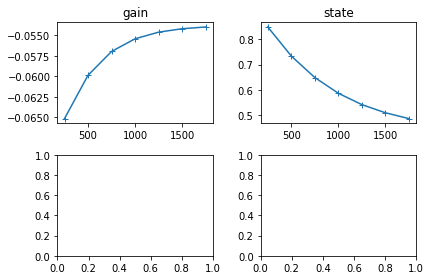

In [16]:
data=reader.read_all(["gain", "state"])
p.plot_metrics(data, 2, 2)

In [34]:
def pivot(xs):
    return np.array([[m["step"], m["value"]] for m in xs]).T

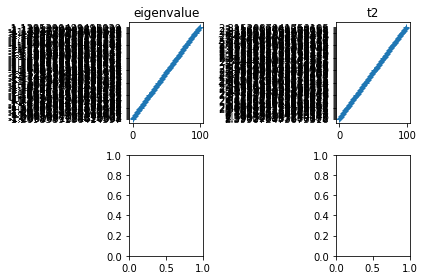

In [63]:

from matplotlib import pyplot as plt
m.plot_metrics(data, 2, 2)

Here's a list of the first 9 0-indexed correlators, with alpha=1.

In [8]:
m.single_matrix_correlators(9, 1, 1.2, 0, 2.5)

DeviceArray([ 1.        ,  0.        ,  2.5       ,  0.        , -1.25      ,  0.        ,  5.20833333,  0.        , -1.21527778], dtype=float64)

Then the 8x8 inner product matrix:

In [10]:
m.inner_product_matrix(8, 1, 1.2, 0, 2.5)

DeviceArray([[  1.        ,   0.        ,   2.5       ,   0.        ,  -1.25      ,   0.        ,   5.20833333,   0.        ],
             [  0.        ,   2.5       ,   0.        ,  -1.25      ,   0.        ,   5.20833333,   0.        ,  -1.21527778],
             [  2.5       ,   0.        ,  -1.25      ,   0.        ,   5.20833333,   0.        ,  -1.21527778,   0.        ],
             [  0.        ,  -1.25      ,   0.        ,   5.20833333,   0.        ,  -1.21527778,   0.        ,   4.4849537 ],
             [ -1.25      ,   0.        ,   5.20833333,   0.        ,  -1.21527778,   0.        ,   4.4849537 ,   0.        ],
             [  0.        ,   5.20833333,   0.        ,  -1.21527778,   0.        ,   4.4849537 ,   0.        ,  17.24054784],
             [  5.20833333,   0.        ,  -1.21527778,   0.        ,   4.4849537 ,   0.        ,  17.24054784,   0.        ],
             [  0.        ,  -1.21527778,   0.        ,   4.4849537 ,   0.        ,  17.24054784,   0.        ,

We can generate big matrices pretty fast:

In [11]:
%time m.inner_product_matrix(100000, 1, 1.2, 0, 2.5).shape

CPU times: user 310 ms, sys: 14.7 ms, total: 324 ms
Wall time: 307 ms


(100000, 100000)

In [ ]:
m.inner_product_matrix(100, 1, 1.2, 0, 2.5)[-1, -1]

In [13]:
ipm = m.inner_product_matrix(10, 1, 1.2, 0, 2.5)

In [14]:
m.min_eigenvalue(10, 1, 1.2, 0, 2.5)

DeviceArray(-142.74398142, dtype=float64)

In [19]:
la.eigvalsh(ipm)

DeviceArray([-1.42743981e+02, -1.09187267e+01, -1.14718876e-01,  6.24100816e-01,  8.92551397e-01,  1.27393352e+00,  1.29144914e+01,  1.63974871e+01,  5.53276153e+01,  1.00701751e+02], dtype=float64)